In [4]:
import numpy as np
import pandas as pd
from sklearn import set_config
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [6]:
set_config(transform_output = "pandas")


In [8]:
penguins = pd.read_csv("../01_materials/notebooks/dataset/penguins.csv")
penguins

,bill_length_mm,flipper_length_mm
0,39.1,181
1,39.5,186
2,40.3,195
3,36.7,193
4,39.3,190
...,...,...
337,55.8,207
338,43.5,202
339,49.6,193
340,50.8,210


In [9]:
penguins.agg(['min','max'])

,bill_length_mm,flipper_length_mm
min,32.1,172
max,59.6,231


In [10]:
penguins_copy = penguins.copy()

In [28]:
scaler = StandardScaler()
standardized_penguins = scaler.fit_transform(penguins_copy)
standardized_penguins  #this is already a dataframe...why? 

,bill_length_mm,flipper_length_mm
0,-0.884499,-1.418347
1,-0.811126,-1.062250
2,-0.664380,-0.421277
3,-1.324737,-0.563715
4,-0.847812,-0.777373
...,...,...
337,2.178824,0.433355
338,-0.077396,0.077258
339,1.041543,-0.563715
340,1.261662,0.647013


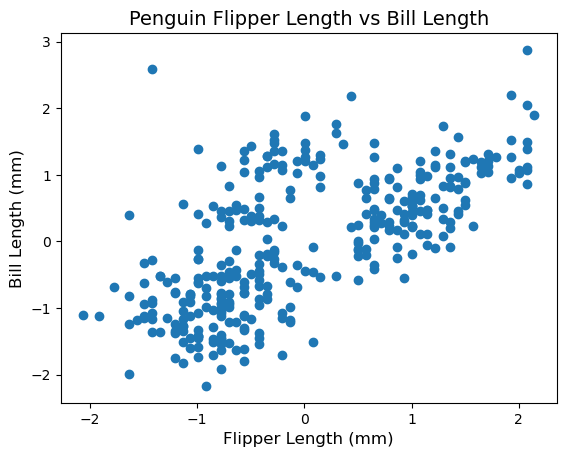

In [29]:
# Scatter plot for bill_length_mm vs flipper_length_mm
plt.scatter(standardized_penguins['flipper_length_mm'], standardized_penguins['bill_length_mm'])

# Adding labels and title
plt.title('Penguin Flipper Length vs Bill Length', fontsize=14)
plt.ylabel('Bill Length (mm)', fontsize=12)
plt.xlabel('Flipper Length (mm)', fontsize=12)

# Display the plot
plt.show()

In [72]:
kmeans = KMeans(
  n_clusters = 5,     # 5 clusters
  n_init = 10,        # 10 different random starts
  random_state = 123  # random seed
)

In [73]:
clusters = kmeans.fit(standardized_penguins)

In [74]:
standardized_penguins_with_clusters = standardized_penguins.copy()

In [75]:
standardized_penguins_with_clusters['Cluster'] = clusters.labels_

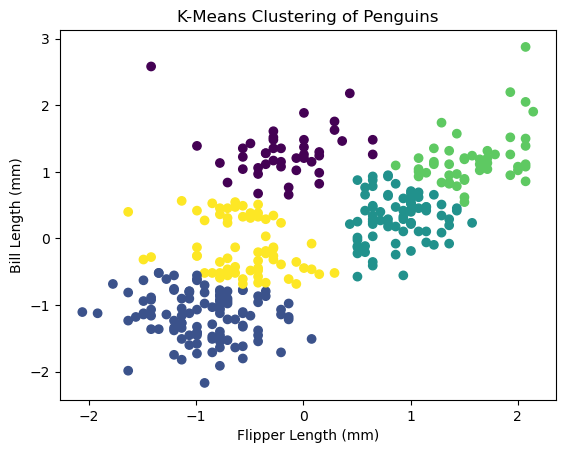

In [76]:
# Plot the clusters
plt.scatter(standardized_penguins_with_clusters['flipper_length_mm'], standardized_penguins_with_clusters['bill_length_mm'], c=standardized_penguins_with_clusters['Cluster'])
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Bill Length (mm)')
plt.title('K-Means Clustering of Penguins')
plt.show()


In [77]:
clusters.inertia_ # how tightly packed are the data points to the 
                  #cluster centroids, larger is worse

91.4761085329853

In [78]:
clusters.n_iter_

10

In [94]:
penguins_clust_ks = pd.DataFrame(columns = ["k", "wssd"])

for k in range(1, 11):
  elbow_kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 123)
  elbow_kmeans.fit(standardized_penguins)
  current_k = pd.DataFrame({"k" : [k], "wssd" : [elbow_kmeans.inertia_]})
  penguins_clust_ks = pd.concat(
    [penguins_clust_ks, current_k], 
    ignore_index = True
  )

/tmp/ipykernel_7765/2630612190.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  penguins_clust_ks = pd.concat(


In [95]:
penguins_clust_ks

,k,wssd
0,1,684.000000
1,2,247.016625
2,3,157.815322
3,4,118.766244
4,5,91.476109
5,6,78.716593
6,7,66.722277
7,8,57.914115
8,9,52.458720
9,10,48.642403


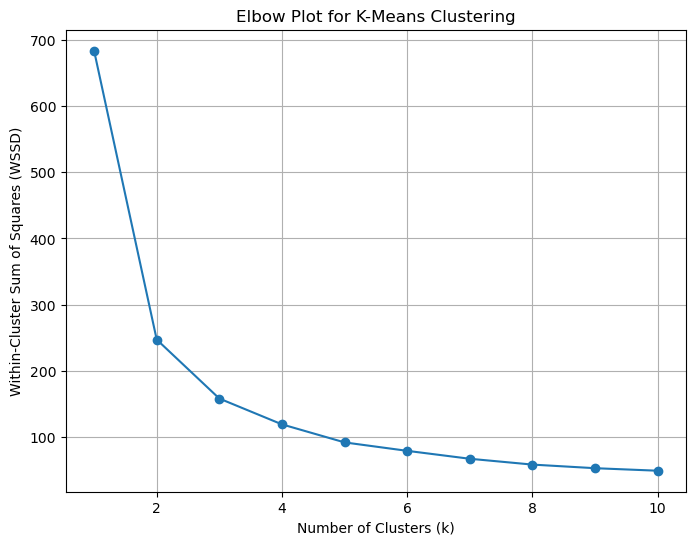

In [99]:
# Create the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(penguins_clust_ks['k'], penguins_clust_ks['wssd'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSSD)')
plt.title('Elbow Plot for K-Means Clustering')
plt.grid(True)
plt.show()